# Practical example

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
data = pd.read_csv('1.04. Real-life example.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Before deleting rows, drop all features we are going to drop:
- **Mileage** - because of high correlation with Year, and Year helps more than Mileage
- **Body** - doesn't help much (coefficients are pretty low)
- **Engine Type** - doesn't help much (coefficients are pretty low)

In [4]:
data.drop(['Engine Type','Body','Mileage'],axis=1, inplace=True)
data.describe(include='all')

,Brand,Price,EngineV,Registration,Year,Model
count,4345,4173.000000,4195.000000,4345,4345.000000,4345
unique,7,NaN,NaN,2,NaN,312
top,Volkswagen,NaN,NaN,yes,NaN,E-Class
freq,936,NaN,NaN,3947,NaN,199
mean,NaN,19418.746935,2.790734,NaN,2006.550058,NaN
std,NaN,25584.242620,5.066437,NaN,6.719097,NaN
min,NaN,600.000000,0.600000,NaN,1969.000000,NaN
25%,NaN,6999.000000,1.800000,NaN,2003.000000,NaN
50%,NaN,11500.000000,2.200000,NaN,2008.000000,NaN
75%,NaN,21700.000000,3.000000,NaN,2012.000000,NaN


### Dealing with missing values

In [5]:
data.isnull().sum()

Brand             0
Price           172
EngineV         150
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
data = data.dropna(axis=0)

In [7]:
data.describe(include='all')

,Brand,Price,EngineV,Registration,Year,Model
count,4025,4025.000000,4025.000000,4025,4025.000000,4025
unique,7,NaN,NaN,2,NaN,306
top,Volkswagen,NaN,NaN,yes,NaN,E-Class
freq,880,NaN,NaN,3654,NaN,188
mean,NaN,19552.308065,2.764586,NaN,2006.379627,NaN
std,NaN,25815.734988,4.935941,NaN,6.695595,NaN
min,NaN,600.000000,0.600000,NaN,1969.000000,NaN
25%,NaN,6999.000000,1.800000,NaN,2003.000000,NaN
50%,NaN,11500.000000,2.200000,NaN,2007.000000,NaN
75%,NaN,21900.000000,3.000000,NaN,2012.000000,NaN


### Exploring the PDFs

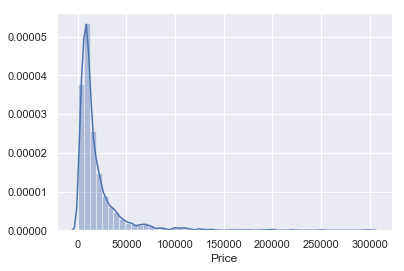

In [8]:
sns.distplot(data['Price'])

### Dealing with outliers

In [9]:
q = data['Price'].quantile(0.99)
data = data[data['Price']<q]
data.describe(include='all')

,Brand,Price,EngineV,Registration,Year,Model
count,3984,3984.000000,3984.000000,3984,3984.000000,3984
unique,7,NaN,NaN,2,NaN,302
top,Volkswagen,NaN,NaN,yes,NaN,E-Class
freq,880,NaN,NaN,3613,NaN,188
mean,NaN,17837.117460,2.743770,NaN,2006.292922,NaN
std,NaN,18976.268315,4.956057,NaN,6.672745,NaN
min,NaN,600.000000,0.600000,NaN,1969.000000,NaN
25%,NaN,6980.000000,1.800000,NaN,2002.750000,NaN
50%,NaN,11400.000000,2.200000,NaN,2007.000000,NaN
75%,NaN,21000.000000,3.000000,NaN,2011.000000,NaN


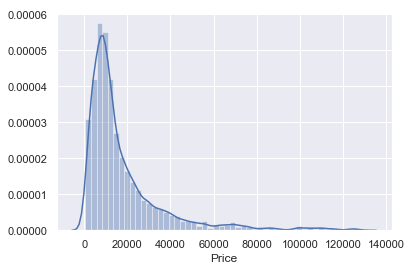

In [10]:
sns.distplot(data['Price'])

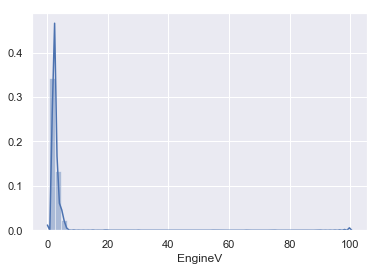

In [11]:
sns.distplot(data['EngineV'])

In [12]:
data = data[data['EngineV']<6.5]

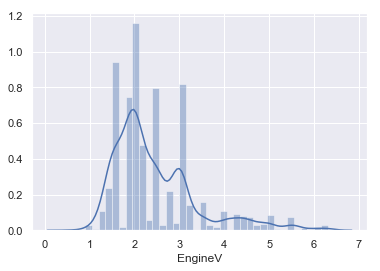

In [13]:
sns.distplot(data['EngineV'])

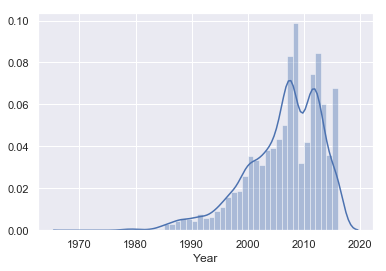

In [14]:
sns.distplot(data['Year'])

In [15]:
q = data['Year'].quantile(0.01)
data = data[data['Year']>q]

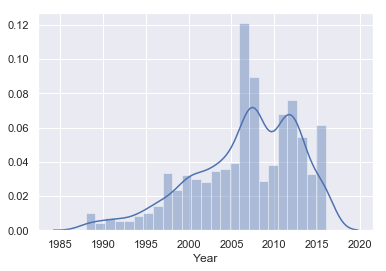

In [16]:
sns.distplot(data['Year'])

In [17]:
data = data.reset_index(drop=True)

In [18]:
data.describe(include='all')

,Brand,Price,EngineV,Registration,Year,Model
count,3905,3905.000000,3905.000000,3905,3905.000000,3905
unique,7,NaN,NaN,2,NaN,295
top,Volkswagen,NaN,NaN,yes,NaN,E-Class
freq,861,NaN,NaN,3540,NaN,183
mean,NaN,18100.297083,2.449795,NaN,2006.620487,NaN
std,NaN,19056.178291,0.947793,NaN,6.173623,NaN
min,NaN,800.000000,0.600000,NaN,1988.000000,NaN
25%,NaN,7150.000000,1.800000,NaN,2003.000000,NaN
50%,NaN,11500.000000,2.200000,NaN,2008.000000,NaN
75%,NaN,21500.000000,3.000000,NaN,2012.000000,NaN


## Checking the OLS assumptions

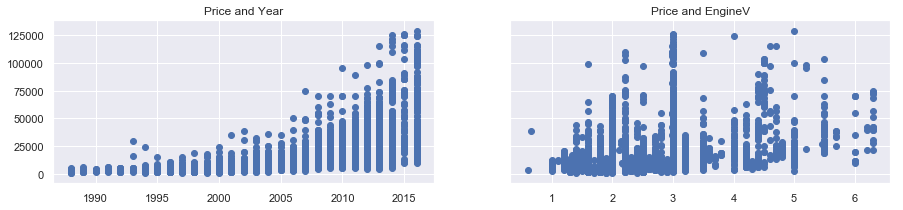

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.scatter(data['Year'],data['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data['EngineV'],data['Price'])
ax2.set_title('Price and EngineV')

plt.show()

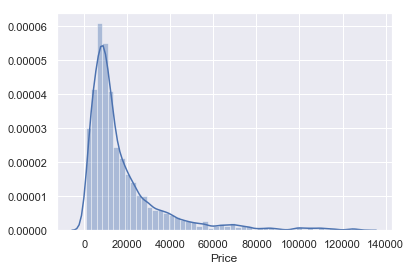

In [20]:
sns.distplot(data['Price'])

### Relaxing the assumptions

In [21]:
log_price = np.log(data['Price'])
data['log_price'] = log_price
data = data.drop(['Price'],axis=1)
data

,Brand,EngineV,Registration,Year,Model,log_price
0,BMW,2.00,yes,1991,320,8.342840
1,Mercedes-Benz,2.90,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,5.00,yes,2003,S 500,9.495519
3,Audi,4.20,yes,2007,Q7,10.043249
4,Toyota,2.00,yes,2011,Rav 4,9.814656
5,BMW,2.00,yes,1997,320,8.716044
6,Audi,2.70,yes,2006,A6,9.560997
7,Renault,1.50,yes,2012,Megane,9.287209
8,Volkswagen,1.80,no,1999,Golf IV,7.244228
9,Renault,1.50,yes,2011,Megane,9.388487


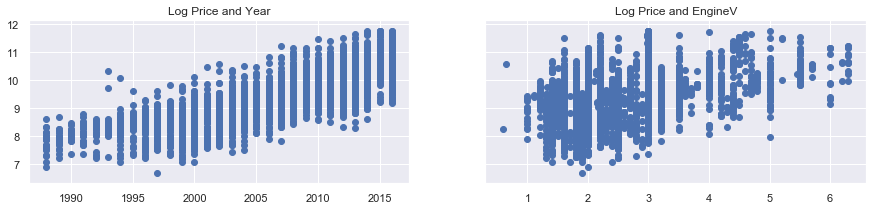

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize =(15,3))
ax1.scatter(data['Year'],data['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data['EngineV'],data['log_price'])
ax2.set_title('Log Price and EngineV')

plt.show()

### Multicollinearity

In [23]:
data.columns.values

array(['Brand', 'EngineV', 'Registration', 'Year', 'Model', 'log_price'],
      dtype=object)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,7.68012,Year
1,7.68012,EngineV


### Remove rare Model values

In [25]:
counts = data['Model'].value_counts()
max_count = counts.max()
index = -1
axes = counts.axes
for count in counts:
    index += 1
    if count < (0.04 * max_count):
        data['Model'].replace(axes[0][index], "Other", inplace=True)
data.describe(include='all')

,Brand,EngineV,Registration,Year,Model,log_price
count,3905,3905.000000,3905,3905.000000,3905,3905.000000
unique,7,NaN,2,NaN,97,NaN
top,Volkswagen,NaN,yes,NaN,Other,NaN
freq,861,NaN,3540,NaN,524,NaN
mean,NaN,2.449795,NaN,2006.620487,NaN,9.407984
std,NaN,0.947793,NaN,6.173623,NaN,0.879213
min,NaN,0.600000,NaN,1988.000000,NaN,6.684612
25%,NaN,1.800000,NaN,2003.000000,NaN,8.874868
50%,NaN,2.200000,NaN,2008.000000,NaN,9.350102
75%,NaN,3.000000,NaN,2012.000000,NaN,9.975808


### Combine Brand and Model together

In [26]:
data['Brand_Model'] = data['Brand'] + '_' + data['Model']
data.drop(['Brand', 'Model'], axis=1, inplace=True)
data.describe(include='all')

,EngineV,Registration,Year,log_price,Brand_Model
count,3905.000000,3905,3905.000000,3905.000000,3905
unique,NaN,2,NaN,NaN,104
top,NaN,yes,NaN,NaN,Mercedes-Benz_E-Class
freq,NaN,3540,NaN,NaN,183
mean,2.449795,NaN,2006.620487,9.407984,NaN
std,0.947793,NaN,6.173623,0.879213,NaN
min,0.600000,NaN,1988.000000,6.684612,NaN
25%,1.800000,NaN,2003.000000,8.874868,NaN
50%,2.200000,NaN,2008.000000,9.350102,NaN
75%,3.000000,NaN,2012.000000,9.975808,NaN


## Create dummy variables

In [27]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,EngineV,Year,log_price,Registration_yes,Brand_Model_Audi_A3,Brand_Model_Audi_A4,Brand_Model_Audi_A5,Brand_Model_Audi_A6,Brand_Model_Audi_A6 Allroad,Brand_Model_Audi_A8,...,Brand_Model_Volkswagen_Passat B7,Brand_Model_Volkswagen_Passat CC,Brand_Model_Volkswagen_Polo,Brand_Model_Volkswagen_Sharan,Brand_Model_Volkswagen_T4 (Transporter),Brand_Model_Volkswagen_T5 (Transporter),Brand_Model_Volkswagen_T5 (Transporter),Brand_Model_Volkswagen_Tiguan,Brand_Model_Volkswagen_Touareg,Brand_Model_Volkswagen_Touran
0,2.0,1991,8.342840,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.9,1999,8.974618,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,2003,9.495519,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.2,2007,10.043249,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2011,9.814656,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Linear regression model

### Declare the inputs and the targets

In [28]:
targets = data['log_price']
inputs = data.drop(['log_price'],axis=1)

### Scale the data

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [30]:
inputs_scaled = scaler.transform(inputs)

C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


### Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [32]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
y_hat = reg.predict(x_train)

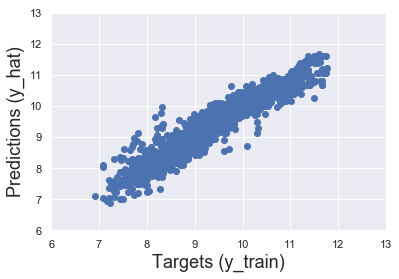

In [34]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

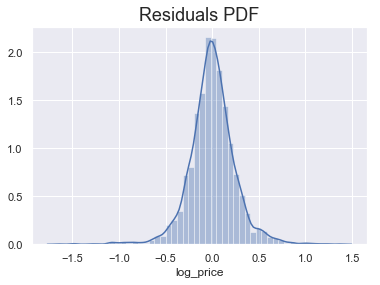

In [35]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [36]:
reg.score(x_train,y_train)

0.9188559833439999

### Finding the weights and bias

In [37]:
reg.intercept_

9.40652572321639

In [38]:
reg.coef_

array([ 1.42293025e-01,  6.12204620e-01,  2.52026044e-01, -1.97803103e-02,
       -3.25675953e-02,  2.40453821e-04, -3.75192753e-02, -1.24858113e-02,
       -1.37307705e-03,  3.90160825e-03,  1.18727399e-02,  1.99304114e-02,
       -8.99605484e-03, -1.52760581e-02, -7.63859651e-03,  5.98249691e-03,
       -8.95765210e-03, -1.86695505e-02, -8.91593584e-04, -1.51492809e-02,
        7.08677263e-03,  6.92123263e-03, -7.09331081e-03, -6.81050847e-03,
        6.52776581e-03,  2.36100803e-02, -1.37519499e-03, -2.79161767e-03,
        9.94872451e-03,  3.22642575e-02,  3.50943332e-02, -5.95025862e-03,
       -1.43957435e-02, -2.92048580e-02,  2.88611296e-02,  1.46813438e-02,
        3.08307334e-02,  3.42194927e-02,  5.05744778e-02,  4.49959702e-03,
       -1.14709671e-03, -5.69099261e-03,  7.94883934e-03,  3.68380338e-02,
       -7.05526215e-03, -1.00191255e-02, -2.61046478e-02,  3.50633683e-02,
       -9.27465703e-02, -3.92610511e-02, -3.86397826e-02, -3.56288612e-02,
       -9.02190600e-02, -

In [39]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,EngineV,0.142293
1,Year,0.612205
2,Registration_yes,0.252026
3,Brand_Model_Audi_A3,-0.019780
4,Brand_Model_Audi_A4,-0.032568
5,Brand_Model_Audi_A5,0.000240
6,Brand_Model_Audi_A6,-0.037519
7,Brand_Model_Audi_A6 Allroad,-0.012486
8,Brand_Model_Audi_A8,-0.001373
9,Brand_Model_Audi_Other,0.003902


## Testing

In [40]:
y_hat_test = reg.predict(x_test)

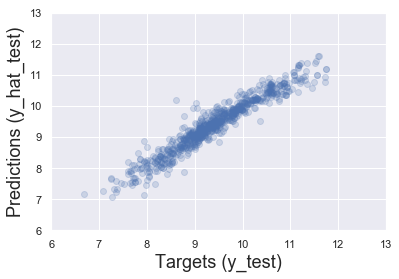

In [41]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [42]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,6808.091469
1,1922.934949
2,36447.578589
3,27200.235396
4,5700.797745


In [43]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,6808.091469,NaN
1,1922.934949,7900.0
2,36447.578589,NaN
3,27200.235396,NaN
4,5700.797745,NaN
5,2126.263559,6100.0
6,3139.886056,NaN
7,6427.910055,NaN
8,19726.682506,1400.0
9,2129.265327,NaN


In [44]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     9.011889
1     7.762171
2    10.505068
3    10.257659
4     8.748305
Name: log_price, dtype: float64

In [45]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,6808.091469,8200.0
1,1922.934949,2350.0
2,36447.578589,36500.0
3,27200.235396,28500.0
4,5700.797745,6300.0
5,2126.263559,1400.0
6,3139.886056,3250.0
7,6427.910055,7700.0
8,19726.682506,20500.0
9,2129.265327,2300.0


In [46]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [47]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,6808.091469,8200.0,1391.908531,16.974494
1,1922.934949,2350.0,427.065051,18.172981
2,36447.578589,36500.0,52.421411,0.143620
3,27200.235396,28500.0,1299.764604,4.560578
4,5700.797745,6300.0,599.202255,9.511147
5,2126.263559,1400.0,-726.263559,51.875968
6,3139.886056,3250.0,110.113944,3.388121
7,6427.910055,7700.0,1272.089945,16.520649
8,19726.682506,20500.0,773.317494,3.772280
9,2129.265327,2300.0,170.734673,7.423247


In [48]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,781.000000,781.000000,781.000000,781.000000
mean,17168.662896,18367.707926,1199.045030,18.379685
std,15645.464989,19582.214657,7991.709314,22.799670
min,1160.056565,800.000000,-20724.374667,0.011667
25%,7159.082399,6999.000000,-1302.288366,5.773182
50%,11980.186559,11500.000000,67.955116,12.549361
75%,21624.766691,21500.000000,1416.423350,23.261819
max,108011.599930,125000.000000,76370.768532,376.806812


In [49]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
147,108011.60,107999.00,-12.60,0.01
80,10603.68,10600.00,-3.68,0.03
596,54023.99,54000.00,-23.99,0.04
283,12905.74,12900.00,-5.74,0.04
520,11980.19,11990.00,9.81,0.08
610,4495.89,4500.00,4.11,0.09
503,26930.13,26900.00,-30.13,0.11
2,36447.58,36500.00,52.42,0.14
633,18168.62,18200.00,31.38,0.17
67,8285.61,8300.00,14.39,0.17


## Main other conclusions:

- Getting Adjusted R2 above .91-.92 is overfitting:
    - the coefficients are huge
    - testing fails with bad results
- Not doing Log function on Price was not shown to be a good idea
- Year is extremely important in the predictions of the model. Not including it lowers R2 significantly
- Model is also extremely important in the predictions of the model. Not including it lowers R2 significantly
- Playing with outliers didn't help much (making them higher/lower, taking from an high/low end that wsan't done in the lecture), most outliers were left after optimization to be ~0.01 percent in the direction as presented in the lecture
- Brand is an important features, there are models that are very rare (and might not be known from training), and Brands differ greatly in price.
- However, there are a lot collinearity between results (some was shown in the course, and some is intuition that needs to be proven):
  - Year and Mileage - high
  - Brand and Model - very high
  - Year and Model - unknown, presumed high
  - Mileage and Model - unknown, presumed average
- Solutions for collinearity:
  - Not including Year and Mileage together, only one of them. Empirically Year wins
  - Not including Brand and Model - however, to make results better, they were made into one feature with their values concatenated
- Following these 2 changes, the coefficients come out decent (and not too high / low which shows overfitting, and including 2 correlated variables)
- It is possible that because of Year and Model are still very correlated, one of them will need to be removed to improve coefficients, and VIFs. This will make the predictions drastically worse.
- In addition, because Model has a lot of rare values, it was attempted to group into Other all rare fields
- It is very possible that with the given data, and using only Linear Regression, it is not possible to create both low collinearity / good coefficients, and good predictions
- Adjusted R2 and R2 gives very close values due to large sample size.  Therefore left using R2 and not Adjusted R2.
- Most of the outliers / removing null values remove too big of percentage of the dataset (~10%), needs to be better resolved by putting values instead of deleting rows
